# Assignment 6
## Task : 1 - Visualization using matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tdata=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
tdata.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
tdata.shape

(1310, 14)

### 1. Create a pie chart presenting the male/female proportion

In [4]:
a=tdata.sex.value_counts()
a

male      843
female    466
Name: sex, dtype: int64

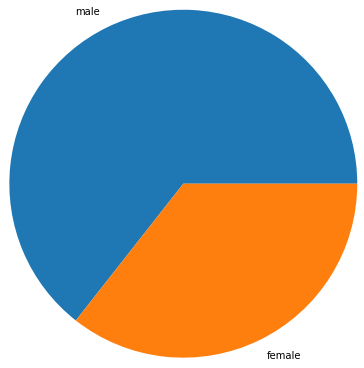

In [5]:
plt.pie(a,labels=a.index,radius=2)
plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

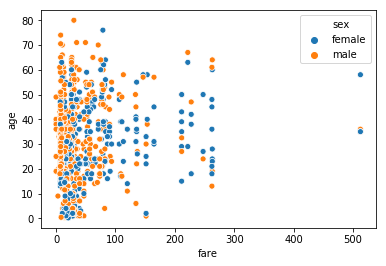

In [6]:
sns.scatterplot(x=tdata.fare,y=tdata.age,hue=tdata.sex,data=tdata)

## Task 2 : Data Mangling : It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis? 

In [7]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',  '12. Air France', '"Swiss Air"']}) 
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).  

In [8]:
df.FlightNumber = range(10045,10086,10)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [9]:
def splitfn(data):
    return str(data).split('_')

newdf=df
tmpdata=df.From_To.apply(splitfn)
newdf['From'] = [x[0] for x in tmpdata.astype(list)]
newdf['To'] = [x[1] for x in tmpdata.astype(list)]
newdf

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".) 

In [10]:
import re
newdf['From'] = [x.capitalize() for x in newdf['From'].astype(list)]
newdf['To'] = [x.capitalize() for x in newdf['To'].astype(list)]
newdf

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions

In [11]:
cols=['From','To','FlightNumber','RecentDelays','Airline']
df=newdf[cols]
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


In [12]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, 10055, 10065, 10075, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',  '12. Air France', '"Swiss Air"']}) 
df.drop('From_To',axis=1,inplace=True)
df = newdf[['From','To','FlightNumber']].merge(df,left_on='FlightNumber', right_on='FlightNumber',how='left')
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


### 5.  the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.</br>Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,delay_2, etc. and replace the unwanted RecentDelays column in df with delays. 

In [13]:
delays=newdf['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(x) for x in delays+1]
df.drop('RecentDelays',axis=1,inplace=True)
df=df.join(delays)
df

,From,To,FlightNumber,Airline,delay_0,delay_1,delay_2
0,London,Paris,10045,KLM(!),23.0,47.0,NaN
1,Madrid,Milan,10055,<Air France> (12),NaN,NaN,NaN
2,London,Stockholm,10065,(British Airways. ),24.0,43.0,87.0
3,Budapest,Paris,10075,12. Air France,13.0,NaN,NaN
4,Brussels,London,10085,"""Swiss Air""",67.0,32.0,NaN
